In [3]:
import copy
from keras.models import clone_model
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import progressbar
import time
import util
np.random.seed(0)

In [54]:
model_number = 190*1000
model = load_model('../saved_models/value_net_iter{0:06d}.h5'.format(model_number))
analyzer = util.ResultsAnalyzer(model, None, None)
end_policy = analyzer.extractPolicy()
analyzer.processPolicy(end_policy)

[[2. 2. 2. 2. 2. 2. 0. 0. 0.]
 [1. 2. 2. 2. 2. 2. 2. 0. 0.]
 [1. 1. 2. 2. 2. 2. 2. 2. 0.]
 [1. 1. 1. 2. 2. 2. 2. 2. 0.]
 [1. 1. 1. 1. 2. 2. 2. 2. 2.]
 [2. 1. 1. 1. 1. 2. 2. 2. 2.]
 [2. 2. 1. 1. 1. 1. 2. 2. 2.]
 [2. 2. 2. 1. 1. 1. 1. 2. 2.]
 [2. 2. 2. 2. 1. 1. 1. 1. 2.]]
0 & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag & \ag \\ 
1 & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \ag & \ag \\ 
2 & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \wt & \ag \\ 
3 & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt & \ag \\ 
4 & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt & \wt \\ 
5 & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt & \wt \\ 
6 & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt & \wt \\ 
7 & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt & \wt \\ 
8 & \wt & \wt & \wt & \wt & \ob & \ob & \ob & \ob & \wt \\ 



In [55]:
x = [5.5973,
7.1863,
5.3510,
3.4371,
3.1367,
3.3230,
2.2831,
2.2678,
2.4155,
2.3401,
2.4069,
2.3901,
2.4570,
2.5797,
2.4849,
2.5265,
2.5060,
2.5477,
2.5244,
2.5491,
2.5557,
2.6129,
2.6057,
2.6461,
2.6773,
2.7261,
2.7254,
2.7111,
2.7707,
2.8284,
2.8250,
2.7686,
2.8788,
2.9524,
2.8266,
2.8878,
2.9929,
2.9490,
2.9261,
2.9443,
2.9247,
2.9970,
2.9807,
3.0932,
3.0689,
4.1290,
3.1757,
4.1285,
3.2368,
3.1616,
3.2302,
3.2794,
3.7010,
3.3482,
3.3169,
3.2848,
5.0563,
9.8165,
7.2128,
5.4654,
6.2152,
6.5929,
4.8255,
4.0505,
4.0116,
4.5165,
4.1764,
4.3960,
4.4577,
4.3646,
4.1668,
4.0466,
4.2155,
4.4573,
4.3624,
4.3457,
4.5205,
4.1395,
4.7616,
4.4522,
4.6926,
4.2881,
4.5563,
4.6502,
4.8728,
4.4388,
4.3599,
4.4635,
4.8299,
5.8258,
4.7094,
4.6218,
4.6954,
5.0666,
4.8969,
5.1419,
4.8821,
4.9591,
5.2063,
4.7708,
5.2512,
4.8849,
4.8296,
4.9064,
5.3780,
5.3864,
5.6884,
5.5320,
5.5428,
5.3465,
5.5889,
5.4498,
5.2609,
5.4612,
5.6722,
5.7716,
8.5362,
5.8986,
6.0078,
5.6727,
5.5540,
5.6885,
5.9872,
5.6949,
5.9246,
5.8335,
5.8406,
5.6864,
6.5043,
6.1763,
5.9254,
5.9905,
6.0597,
5.9907,
6.3251,
5.8398,
5.8286,
6.4020,
6.2201,
6.2150,
6.5418,
6.2008,
6.5191,
6.3091,
6.1428,
6.1535,
6.1417,
6.1482,
6.8894,
6.1965,
6.2831,
6.3784,
6.9101,
6.6076,
6.6850,
6.7986,
6.8689,
7.0552,
6.6367,
6.4755,
6.5174,
6.5284,
6.6757,
6.8882,
7.0490,
6.9360,
7.3696,
7.2295,
7.1360,
6.8598,
7.0941,
8.9517,
8.5641,
11.3481,
11.4682,
13.5702,
10.5819,
10.5029,
11.1499,
10.5713,
10.8807,
11.3593,
11.3678,
10.6601,
13.2213,
11.0494,
9.6540,
8.6962,
8.9942,
8.5755,
8.2085,
9.2310,
8.6042,
8.8462,
11.1050,
9.3368,
8.9109,
8.5613,
7.9498,
7.9651,
]

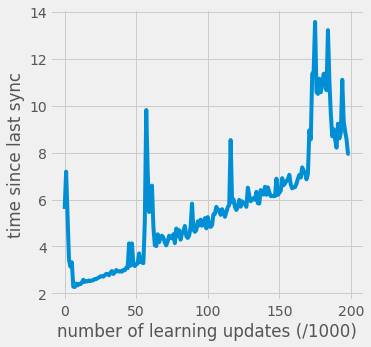

In [62]:
plt.style.use('fivethirtyeight')
_f, ax = plt.subplots(figsize=(5,5))
ax
ax.set_ylabel('time since last sync')
ax.set_xlabel('number of learning updates (/1000)')
ax.plot(x)
plt.show()